In [1]:
import torch 
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Load the dataset 
transforms = transforms.Compose([transforms.ToTensor(), 
    transforms.Normalize(mean=[0.1307], std=[0.3081])])
data_train = MNIST(root='./data', train=True, transform=transforms, download=False)
data_test = MNIST(root='/data', train=False, transform=transforms, download=False)

Test Distribution

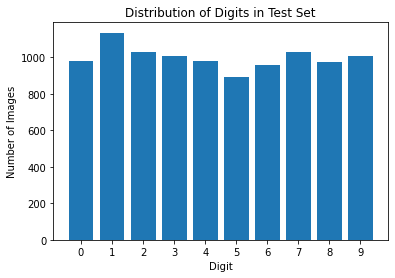

In [3]:
test_classes = [label for _, label in data_test]
test_dist = Counter(test_classes)
test_dist = sorted(test_dist.items())
x = [label for label, _ in test_dist]
y = [num for _, num in test_dist]
plt.bar(x, y)
plt.xticks(x)
plt.ylabel("Number of Images")
plt.xlabel("Digit")
plt.title("Distribution of Digits in Test Set")
plt.show()

Split the Dataset

In [4]:
data_train, data_val = torch.utils.data.random_split(data_train, [50000, 10000])

Add Label Noise

In [5]:
from Noise import MyDataSetNoisyWrapper
uniform_noisy_dataset = MyDataSetNoisyWrapper(data_train, 
    corruption_prob=0.5, num_classes=10, noise_type='uniform')
uniform_noisy_dataset

Noise Type : uniform, Corruption Probability : 0.5, Corruption Matrix : [[0.55 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.55 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.55 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.55 0.05 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.55 0.05 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.55 0.05 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.55 0.05 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.55 0.05 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.55 0.05]
 [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.55]]

In [6]:
diag1_noisy_dataset = MyDataSetNoisyWrapper(data_train, 
    corruption_prob=0.5, num_classes=10, noise_type='diag-1')
diag1_noisy_dataset

Noise Type : diag-1, Corruption Probability : 0.5, Corruption Matrix : [[0.5 0.  0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.5 0.  0.  0.  0.5 0.  0.  0. ]
 [0.5 0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.5]]

In [7]:
diag2_noisy_dataset = MyDataSetNoisyWrapper(data_train,
    corruption_prob=0.5, num_classes=10, noise_type='diag-2')
diag2_noisy_dataset

Noise Type : diag-2, Corruption Probability : 0.5, Corruption Matrix : [[0.5  0.   0.   0.25 0.   0.   0.   0.   0.   0.25]
 [0.   0.5  0.   0.   0.25 0.   0.   0.   0.25 0.  ]
 [0.   0.25 0.5  0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.5  0.25 0.   0.   0.   0.25 0.  ]
 [0.   0.   0.25 0.   0.5  0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.5  0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.5  0.   0.   0.25]
 [0.   0.   0.   0.   0.   0.25 0.   0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.   0.25 0.25 0.   0.5  0.  ]
 [0.   0.   0.   0.   0.25 0.25 0.   0.   0.   0.5 ]]

Training Set

In [8]:
# Lets use diag 2 
corrupted_train = MyDataSetNoisyWrapper(data_train,
    corruption_prob=0.5, num_classes=10, noise_type='diag-2')

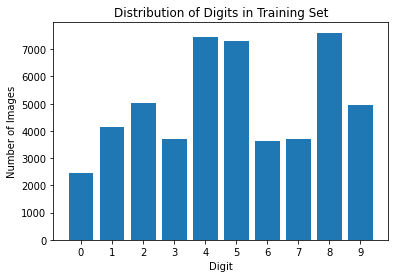

In [9]:
train_classes = [label for _, label in corrupted_train]
train_dist = Counter(train_classes)
train_dist = sorted(train_dist.items())
x = [label for label, _ in train_dist]
y = [num for _, num in train_dist]
plt.bar(x, y)
plt.xticks(x)
plt.ylabel("Number of Images")
plt.xlabel("Digit")
plt.title("Distribution of Digits in Training Set")
plt.show()

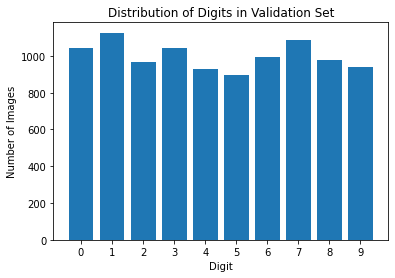

In [10]:
val_classes = [label for _, label in data_val]
val_dist = Counter(val_classes)
val_dist = sorted(val_dist.items())
x = [label for label, _ in val_dist]
y = [num for _, num in val_dist]
plt.bar(x, y)
plt.xticks(x)
plt.ylabel("Number of Images")
plt.xlabel("Digit")
plt.title("Distribution of Digits in Validation Set")
plt.show()

---

Split the dataset 

In [13]:
from Split import LDASplitter
CLIENT_NUM = 10
spliitter = LDASplitter(client_num=CLIENT_NUM, alpha=0.5)
data_train_list = spliitter(corrupted_train)

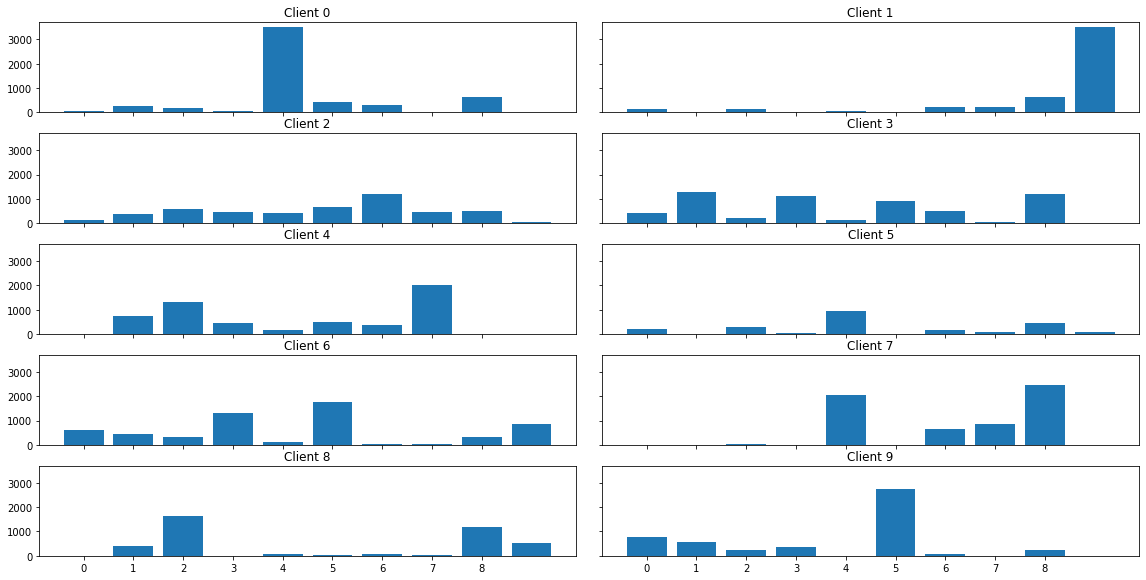

In [26]:
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(16, 8))
fig.tight_layout()
for i, ax in enumerate(axs.flat):
    client_data = data_train_list[i]
    classes = [label for _, label in client_data]
    dist = Counter(classes)
    dist = sorted(dist.items())
    x = [label for label, _ in dist]
    y = [num for _, num in dist]
    ax.bar(x, y)
    ax.set_title(f"Client {i}")
    ax.set_xticks(x)

---
Basic FedAvg

In [32]:
from Model import ConvNet2
model = ConvNet2(in_channels=1, h=28, w=28, class_num=10, 
    hidden=256, use_bn=True, dropout=0.3)
# Test Model Output
model(torch.randn(1, 1, 28, 28))

tensor([[-0.2748, -0.0867, -0.0408,  0.2319,  0.3187, -0.3521,  0.2377,  0.0494,
          0.2221,  0.8561]], grad_fn=<AddmmBackward0>)

In [33]:
fed_data_loaders = [
    DataLoader(client_data, batch_size=128, shuffle=True) for  client_data in data_train_list
]
fed_client_models = [
    ConvNet2(in_channels=1, h=28, w=28, class_num=10, hidden=256, use_bn=True, dropout=0.3) for _ in range(CLIENT_NUM)     
]
server_model = ConvNet2(in_channels=1, h=28, w=28, class_num=10, hidden=256, use_bn=True, dropout=0.3)

In [ ]:
# Train 
# Configuration
LOCAL_STEP = 5
ROUND = 50

for round in ROUND: 
    print(f"Round {round}")
    for local_step in range(LOCAL_STEP):
        print(f"Local Step {local_step}")
        # Train on local
        for client_id, client_model in enumerate(fed_client_models):
            print(f"Client {client_id}")
            for data, target in fed_data_loaders[client_id]:
                data, target = data.to(device), target.to(device)
                output = client_model(data)
                loss = F.cross_entropy(output, target)
                loss.backward()
                client_model.optimizer.step()
                client_model.optimizer.zero_grad()
        # Train on server
        for data, target in data_train:
            data, target = data.to(device), target.to(device)
            output = server_model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            server_model.optimizer.step()
            server_model.optimizer.zero_grad()
        # Test on local
        for client_id, client_model in enumerate(fed_client_models):
            print(f"Client {client_id}")
            for data, target in fed_data_loaders[client_id]:
                data, target = data.to(device), target.to(device)
                output = client_model(data)
                loss = F.cross_entropy(output, target)
                loss.backward()
                client_model.optimizer.step()
                client_model.optimizer.zero_grad()
        # Test on server
        for data, target in data_train:
            data, target = data.to(device), target.to(device)
            output = server_model(data)
            loss = F.cross_entropy(output, target)
            loss.backward()
            server_model.optimizer.step()
            server_model.optimizer.zero_grad()
        # Test on local
        for client_id, client_model in


---
Meta-Net FedAvg

---
Basic FedSGD

---
Meta-Net FedSGD